# PRODUCT RECOGNITION ON STORE SHELVES

### Manuel Gabrielli - manuel.gabrielli@studio.unibo.it


---


## Overall Task:
Develop a computer vision system that, given a reference image for each product, is able to identify boxes of cereals of different brands from one picture of a store shelf. For each type of product displayed in the shelf the system should report:
1. Number of instances.
2. Dimension of each instance (width and height of the bounding box that enclose them in pixel).<br>
<img src="imageAssignment1.png" width="500"><br>
3. Position in the image reference system of each instance (center of the bounding box that enclose them in pixel).
For example, as output of the above image the system should print: <br>
<img src="imageAssignment2.png" width="600">


## Step A - Multiple Product Detection

- Test on scene image: {e1.png, e2.png, e3.png, e4.png, e5.png}
- Use product images: {0.jpg, 1.jpg, 11.jpg, 19.jpg, 24.jpg, 25.jpg, 26.jpg}

Develop an object detection system to identify single instance of products given: one reference image for
each item and a scene image. 

The system should be able to correctly identify all the product in the shelves
image.

In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [26]:
model_index = {
    0: 0,
    1: 1,
    2: 11,
    3: 19,
    4: 24,
    5: 25,
    6: 26
}

models_estenstion = ".jpg"

models_path = "models/"

num_models = len(model_index);

In [27]:
def get_model(i, printDetails):
    if i == 0:
        if(printDetails):
            print("Model " + str(model_index[i]) +": Nesquik Cioccomilk")
        return "Nesquik"
    elif i == 1:
        if(printDetails):
            print("Model " + str(model_index[i]) +": Blue ChocoKrave")
        return "CK Blue"
    elif i == 2:
        if(printDetails):
            print("Model " + str(model_index[i]) +": Orange ChocoKrave")
        return "CK Orange"
    elif i == 3:
        if(printDetails):
            print("Model " + str(model_index[i]) +": Country Crisp")
        return "Country Crisp"
    elif i == 4:
        if(printDetails):
            print("Model " + str(model_index[i]) +": Fitness")
        return "Fitness"
    elif i == 5:
        if(printDetails):
            print("Model " + str(model_index[i]) +": Coco Pops")
        return "Coco Pops"
    elif i == 6:
        if(printDetails):
            print("Model " + str(model_index[i]) +": Nesquik Duo")
        return "Nesquik Duo"

In [28]:
#open and conversion to original colours
images = {}
for i in range(num_models):
    img = cv2.imread(models_path+str(model_index[i])+models_estenstion);
    images[i] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
    
#gray version of the image
# gray_images = {}
# for i in range(num_models):
#     gray_images = cv2.cvtColor(images_bgr[i],cv2.COLOR_BGR2GRAY)

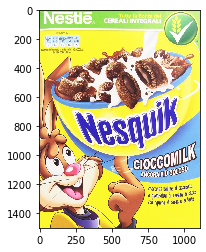

In [29]:
#plt.figure(figsize=(5, 10))
plt.imshow(images[0]);
plt.show();

In [30]:
#Estraggo i canali separatamente per usarli successivamente per ottenere i punti chiave

# Getting the first axis, Red
R_models = {}
for i in range(num_models):
    R_models[i] = images[i][:,:,0]

# Getting the second axis, Green
G_models = {}
for i in range(num_models):
    G_models[i] = images[i][:,:,1]

# Getting the third axis, Blue
B_models = {}
for i in range(num_models):
    B_models[i] = images[i][:,:,2]

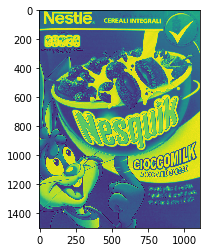

In [31]:
#plt.figure(figsize=(5, 10))
plt.imshow(B_models[0]);
plt.show();

Find Average color

In [32]:
average_colors = {}

for i in range(num_models):
    #non considero il primo terzo dell'immagine che molte volte contiene il logo della marca
    start_row = int(images[i].shape[0]/3)
    #seleziono la parte dell'imagine da considerare
    selected_image = images[i][start_row: images[i].shape[0], :]
    #faccio la media
    average_color_row = np.average(selected_image, axis=0)
    average_colors[i] = np.average(average_color_row, axis=0).astype(int).tolist()


In [33]:
average_colors

{0: [192, 177, 132],
 1: [130, 132, 126],
 2: [185, 123, 55],
 3: [111, 114, 114],
 4: [184, 163, 185],
 5: [174, 117, 120],
 6: [200, 142, 102]}

In [34]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# calcola key points in base ai tre canali colorati

### fine

In [35]:
kp_models = {}
des_models = {}

for i in range(num_models):
    
    # find the keypoints and descriptors with SIFT
    kp_models[i] = sift.detect(images[i])
    
    # Describing keypoints for model images
    kp_models[i], des_models[i] = sift.compute(images[i], kp_models[i])

# Analizzo tutte le scene una dopo l'altra

In [36]:
scenes_names = ["e1", "e2", "e3", "e4", "e5"]

scenes_estenstion = ".png"

scene_path = "scenes/"

num_scenes = len(scenes_names)

#variabili da portare fuori
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale=1.0

# Checking if we found enough matching
MIN_MATCH_COUNT = 60

In [58]:
# the centroid or geometric center of a plane figure is the arithmetic mean position of all the points in the shape.
#calculated by the sum of the x coord divided by the number and the sum of y coord dividend by the number
def getCentroid(vertices):
    sum_coord = [0,0]
    for i in range(len(vertices)):
        sum_coord = sum_coord + vertices[i][0]
    return (int(sum_coord[0]/len(vertices)), int(sum_coord[1]/len(vertices)))

In [69]:
dst[][0]

array([ -6.2197113, 457.60303  ], dtype=float32)

In [62]:
def searchTemplates(models, scenes):
    for s in range(len(scenes)):
        #detect key points
        kp_scene = sift.detect(scenes[s])

        # Describing keypoints for scene image
        kp_scene, des_scene = sift.compute(scenes[s], kp_scene)
        
        matches = {}
        
        for i in range(len(models)):
            # Matching and finding the 2 closest elements for each query descriptor.
            matches[i] = flann.knnMatch(des_models[i],des_scene,k=2)
            
        good = {}
        for i in range(len(models)):
            good[i] = []
            for m,n in matches[i]:
                if m.distance < 0.7*n.distance:
                    good[i].append(m)
                    
        copy_scene = np.copy(scenes[s])


        #loop over all the possible models
        for i in range(len(models)):

            text = get_model(i, True)

            if len(good[i])>MIN_MATCH_COUNT:
                # building the corrspondences arrays of good matches
                src_pts = np.float32([ kp_models[i][m.queryIdx].pt for m in good[i] ]).reshape(-1,1,2)
                dst_pts = np.float32([ kp_scene[m.trainIdx].pt for m in good[i] ]).reshape(-1,1,2)
                # Using RANSAC to estimate a robust homography. 
                # It returns the homography M and a mask for the discarded points
                M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

                # Mask of discarded point used in visualization
                matchesMask = mask.ravel().tolist()

                # Corners of the query image
                h,w = images[i].shape[0:2]
                pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

                # Projecting the corners into the train image
                dst = cv2.perspectiveTransform(pts,M)


                #FACENDO IL CONTROLLO SUL COLORE DELL'AREA CAPISCONO QUALI SONO LE SCATOLE PRESENTI E QUALI NO
                #controlla che la scatola non sia troppo inclinata, e quindi storpiata
                if ((abs(dst[0,0][0]-dst[1,0][0])<30) and abs(dst[0,0][1]-dst[3,0][1])<30 
                    and abs(dst[2,0][0]-dst[3,0][0])<30 and abs(dst[1,0][1]-dst[2,0][1])<30):

                    #if dealing with chocokrave (correct model)
                    if (model_index[i] == 1 or model_index[i]==11):
                        dst= np.int32(dst)+(0,30)

                    #control over the colour of a significant area
                    #control + ù
                    x_1=int((dst[0,0][0]+dst[1,0][0])/2)
                    if(x_1<0):
                        x_1=0
                    if(x_1>=copy_scene.shape[1]): #se esce dalla figura perchè è maggiore della dimensione della scena lo metto a uno 
                        x_1=copy_scene.shape[1]-1 #in meno rispetto alla dimensione della scena
                    y_1=int((dst[0,0][1]+dst[3,0][1])/2)
                    if(y_1<0):
                        y_1=0
                    if(y_1>=copy_scene.shape[0]):
                        y_1=copy_scene.shape[0]-1
                    x_2=int((dst[2,0][0]+dst[3,0][0])/2)
                    if(x_2<0):
                        x_2=0
                    if(x_2>=copy_scene.shape[1]):
                        x_2=copy_scene.shape[1]-1
                    y_2=int((dst[1,0][1]+dst[2,0][1])/2)
                    if(y_2<0):
                        y_2=0
                    if(y_2>=copy_scene.shape[0]):
                        y_2=copy_scene.shape[0]-1

                    y_aux = int(y_1+(y_2-y_1)/3)

                    selected_area = copy_scene[y_aux:y_2, x_1:x_2]
                    average_area_row = np.average(selected_area, axis=0)
                    average_area = np.average(average_area_row, axis=0).astype(int).tolist()

                    #print(accum_area, ref_colour[i])

                    color_first=abs(average_colors[i][0]-average_area[0])
                    color_second=abs(average_colors[i][1]-average_area[1])
                    color_third=abs(average_colors[i][2]-average_area[2])

                    #check on colour mean
                    #la differenza tra il colore primario ottenuto dell'area e quello del modello deve essere entro certi parametri
                    if(color_first<33 and color_second<33 and color_third <33 and  color_first+color_second+color_third<60):

                        #perimeter=width+lower_width+height+lower_height
                        #print(perimeter)
                        #per_check[i] = (i,perimeter, dst)

                        #dst=per_check[j][2]

                        #vecchio codice
                        # Drawing the bounding box
                        copy_scene = cv2.polylines(copy_scene,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
                        

                        (text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=3)[0]
                        offset_1=(int(dst[1,0][0]), int(dst[1,0][1])+10)
                        offset_2=(int(dst[2,0][0]), int(dst[1,0][1])-text_height-5)
                        width = int(round(dst[2,0][0] - dst[0,0][0]))
                        height = int(round(dst[1,0][1] - dst[0,0][1]))
                        cv2.rectangle(copy_scene,offset_1, offset_2, (0,255,0), cv2.FILLED)
                        #centered position of the text wrt the rectangle
                        org = (int(dst[1,0][0]+(width/2-text_width/2)), int(dst[1,0][1])) 
                        cv2.putText(copy_scene,text,org, font, font_scale,(0,0,0),3,cv2.LINE_AA)
                        center = getCentroid(dst)
                        print("Center: [{},{}]".format(center[0], center[1]))
                        print("Number matches found - {}/{}".format(len(good[i]), MIN_MATCH_COUNT))

                    else:
                        print("Number matches found - {}/{}".format(len(good[i]), MIN_MATCH_COUNT))
                        print("But the model does not appear in the scene");

            else:
                print( "Not enough matches are found - {}/{}".format(len(good[i]), MIN_MATCH_COUNT) )
                matchesMask = None
                
        #print scene image
        plt.figure(figsize=(20, 10))
        plt.imshow(copy_scene);
        plt.show();

In [59]:
getCentroid(dst)

(162, 233)

In [38]:
#open and conversion to original colours
scenes = {}
for i in range(num_scenes):
    img = cv2.imread(scene_path+scenes_names[i]+scenes_estenstion);
    scenes[i] = cv2.cvtColor(img,cv2.COLOR_BGR2RGB);

In [39]:
# Defining index for approximate kdtree algorithm
FLANN_INDEX_KDTREE = 1

# Defining parameters for algorithm 
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

# Defining search params.
# checks=50 specifies the number of times the trees in the index should be recursively traversed.
# Higher values gives better precision, but also takes more time
search_params = dict(checks = 50)

# Initializing matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

Model 0: Nesquik Cioccomilk
Center: [162,214]
Number matches found - 352/60
Model 1: Blue ChocoKrave
Number matches found - 196/60
But the model does not appear in the scene
Model 11: Orange ChocoKrave
Center: [442,195]
Number matches found - 117/60
Model 19: Country Crisp
Not enough matches are found - 6/60
Model 24: Fitness
Not enough matches are found - 30/60
Model 25: Coco Pops
Not enough matches are found - 45/60
Model 26: Nesquik Duo


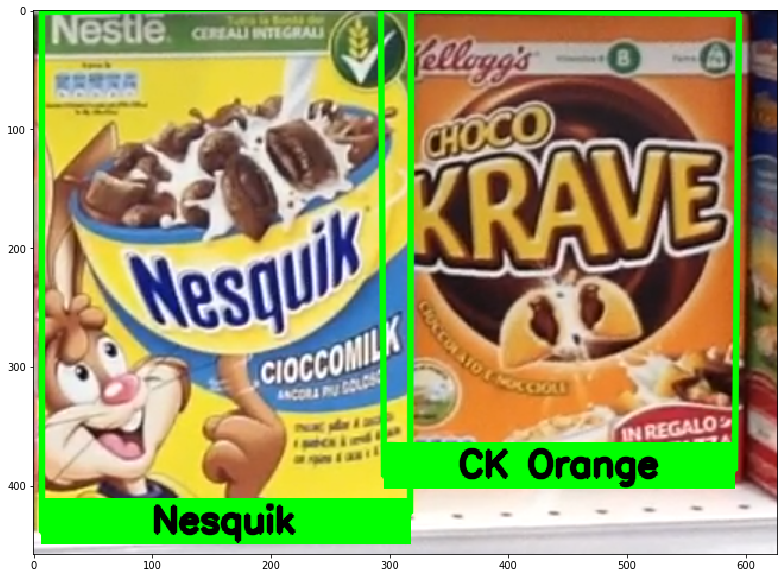

Model 0: Nesquik Cioccomilk
Model 1: Blue ChocoKrave
Model 11: Orange ChocoKrave
Not enough matches are found - 9/60
Model 19: Country Crisp
Not enough matches are found - 9/60
Model 24: Fitness
Center: [167,219]
Number matches found - 225/60
Model 25: Coco Pops
Center: [878,232]
Number matches found - 240/60
Model 26: Nesquik Duo
Center: [538,218]
Number matches found - 266/60


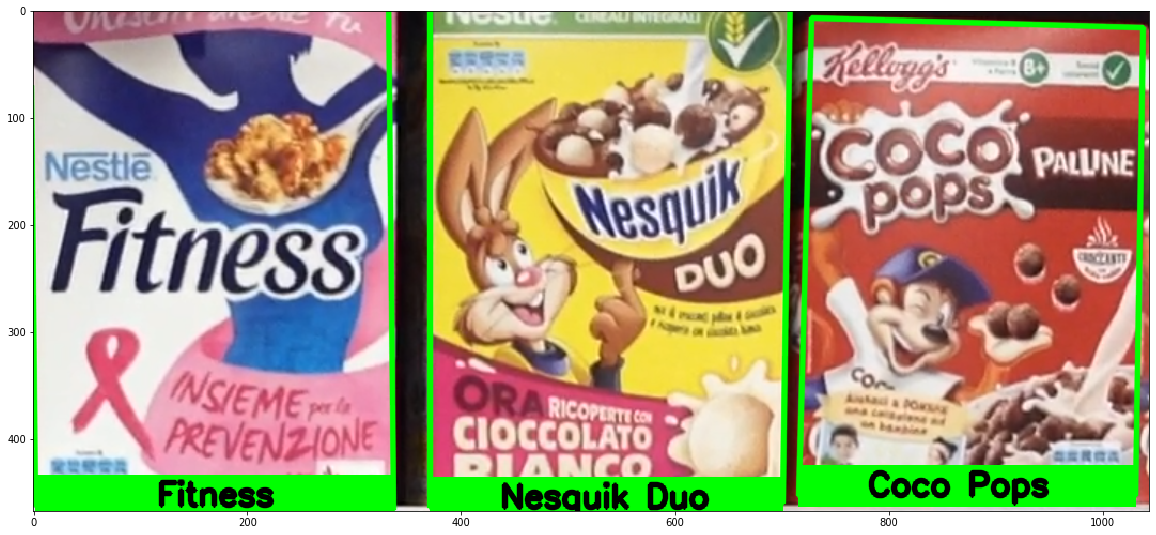

Model 0: Nesquik Cioccomilk
Center: [170,236]
Number matches found - 321/60
Model 1: Blue ChocoKrave
Number matches found - 201/60
But the model does not appear in the scene
Model 11: Orange ChocoKrave
Center: [474,215]
Number matches found - 101/60
Model 19: Country Crisp
Not enough matches are found - 5/60
Model 24: Fitness
Not enough matches are found - 7/60
Model 25: Coco Pops
Model 26: Nesquik Duo
Not enough matches are found - 56/60


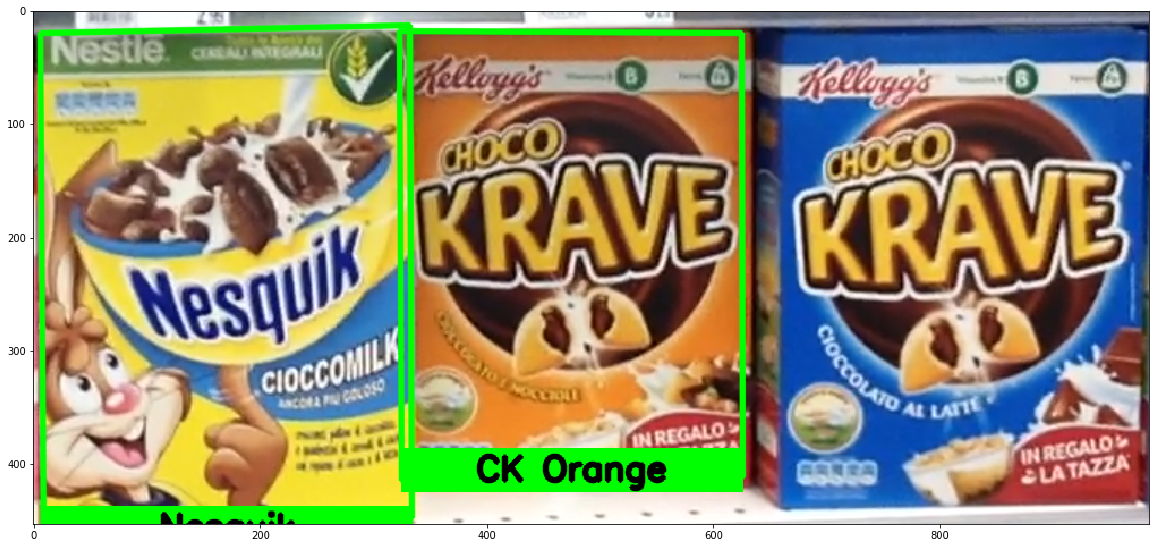

Model 0: Nesquik Cioccomilk
Center: [158,739]
Number matches found - 293/60
Model 1: Blue ChocoKrave
Number matches found - 216/60
But the model does not appear in the scene
Model 11: Orange ChocoKrave
Center: [462,719]
Number matches found - 121/60
Model 19: Country Crisp
Not enough matches are found - 11/60
Model 24: Fitness
Not enough matches are found - 6/60
Model 25: Coco Pops
Center: [555,208]
Number matches found - 207/60
Model 26: Nesquik Duo
Center: [205,195]
Number matches found - 213/60


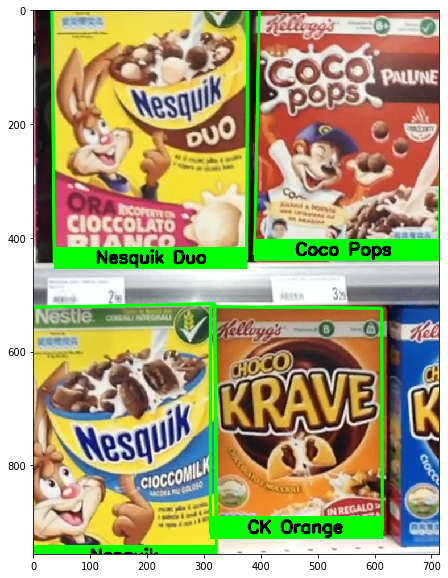

Model 0: Nesquik Cioccomilk


C:\Users\utente\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)


ZeroDivisionError: division by zero

In [63]:
searchTemplates(images, scenes)

# vecchio codice

Available scenes are:

e1, e2, e3, e4, e5

In [10]:
#choose the scene
scene_name = input("Choose a scene and press Enter:  ")

Choose a scene and press Enter:  e5


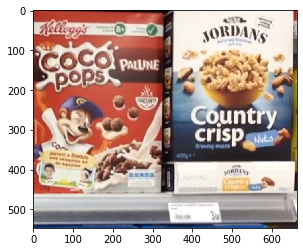

In [11]:
scene_path = "scenes/" + scene_name + ".png"

#open scene image
scene_image = cv2.imread(scene_path)
scene_image_rgb = cv2.cvtColor(scene_image,cv2.COLOR_BGR2RGB)
plt.imshow(scene_image_rgb);
plt.show();

In [12]:
#detect key points
kp_scene = sift.detect(scene_image_rgb)

In [13]:
# Describing keypoints for scene image
kp_scene, des_scene = sift.compute(scene_image_rgb, kp_scene)

ricerca nella immagine della scena

In [17]:
# Defining index for approximate kdtree algorithm
FLANN_INDEX_KDTREE = 1

# Defining parameters for algorithm 
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

# Defining search params.
# checks=50 specifies the number of times the trees in the index should be recursively traversed.
# Higher values gives better precision, but also takes more time
search_params = dict(checks = 50)

# Initializing matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = {}
for i in range(num_models):
    # Matching and finding the 2 closest elements for each query descriptor.
    matches[i] = flann.knnMatch(des_models[i],des_scene,k=2)

In [18]:
good = {}
for i in range(num_models):
    good[i] = []
    for m,n in matches[i]:
        if m.distance < 0.7*n.distance:
            good[i].append(m)

In [19]:
copy_scene = np.copy(scene_image_rgb)
# Checking if we found enough matching
MIN_MATCH_COUNT = 60

per_check = {}

#loop over all the possible models
for i in range(num_models):
    
    text = get_model(i, True)
    
    if len(good[i])>MIN_MATCH_COUNT:
        # building the corrspondences arrays of good matches
        src_pts = np.float32([ kp_models[i][m.queryIdx].pt for m in good[i] ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp_scene[m.trainIdx].pt for m in good[i] ]).reshape(-1,1,2)
        # Using RANSAC to estimate a robust homography. 
        # It returns the homography M and a mask for the discarded points
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        # Mask of discarded point used in visualization
        matchesMask = mask.ravel().tolist()

        # Corners of the query image
        h,w = images[i].shape[0:2]
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

        # Projecting the corners into the train image
        dst = cv2.perspectiveTransform(pts,M)

        #------------------------------------------------------------------
        width = int(round(dst[2,0][0] - dst[0,0][0]))
        height = int(round(dst[1,0][1] - dst[0,0][1]))
        lower_width = int(round(dst[3,0][0] - dst[1,0][0]))
        lower_height = int(round(dst[2,0][1] - dst[3,0][1]))
        
        
        #FACENDO IL CONTROLLO SUL COLORE DELL'AREA CAPISCONO QUALI SONO LE SCATOLE PRESENTI E QUALI NO
        #controlla che la scatola non sia troppo inclinata, e quindi storpiata
        if ((abs(dst[0,0][0]-dst[1,0][0])<30) and abs(dst[0,0][1]-dst[3,0][1])<30 
            and abs(dst[2,0][0]-dst[3,0][0])<30 and abs(dst[1,0][1]-dst[2,0][1])<30):

            print("section 1")
            #if dealing with chocokrave (correct model)
            if (model_index[i] == 1 or model_index[i]==11):
                dst= np.int32(dst)+(0,30)

            #control over the colour of a significant area
            #control + ù
            x_1=int((dst[0,0][0]+dst[1,0][0])/2)
            if(x_1<0):
                x_1=0
            if(x_1>=copy_scene.shape[1]): #se esce dalla figura perchè è maggiore della dimensione della scena lo metto a uno 
                x_1=copy_scene.shape[1]-1 #in meno rispetto alla dimensione della scena
            y_1=int((dst[0,0][1]+dst[3,0][1])/2)
            if(y_1<0):
                y_1=0
            if(y_1>=copy_scene.shape[0]):
                y_1=copy_scene.shape[0]-1
            x_2=int((dst[2,0][0]+dst[3,0][0])/2)
            if(x_2<0):
                x_2=0
            if(x_2>=copy_scene.shape[1]):
                x_2=copy_scene.shape[1]-1
            y_2=int((dst[1,0][1]+dst[2,0][1])/2)
            if(y_2<0):
                y_2=0
            if(y_2>=copy_scene.shape[0]):
                y_2=copy_scene.shape[0]-1

            y_aux = int(y_1+(y_2-y_1)/3)
            
            selected_area = copy_scene[y_aux:y_2, x_1:x_2]
            #selected_area = copy_scene[int(dst[0,0][1]):int(dst[2,0][1]),int(dst[0,0][0]):int(dst[2,0][0])]
            average_area_row = np.average(selected_area, axis=0)
            average_area = np.average(average_area_row, axis=0).astype(int).tolist()

            #print(accum_area, ref_colour[i])

            color_first=abs(average_colors[i][0]-average_area[0])
            color_second=abs(average_colors[i][1]-average_area[1])
            color_third=abs(average_colors[i][2]-average_area[2])

            #check on colour mean
            #la differenza tra il colore primario ottenuto dell'area e quello del modello deve essere entro certi parametri
            if(color_first<33 and color_second<33 and color_third <33 and  color_first+color_second+color_third<60):

                print("section 2")
                #perimeter=width+lower_width+height+lower_height
                #print(perimeter)
                #per_check[i] = (i,perimeter, dst)
                
                #dst=per_check[j][2]
                
                #vecchio codice
                copy_scene = cv2.polylines(copy_scene,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
                #variabili da portare fuori
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale=1.0

                (text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=3)[0]
                offset_1=(int(dst[1,0][0]), int(dst[1,0][1])+10)
                offset_2=(int(dst[2,0][0]), int(dst[1,0][1])-text_height-5)
                width = int(round(dst[2,0][0] - dst[0,0][0]))
                height = int(round(dst[1,0][1] - dst[0,0][1]))
                cv2.rectangle(copy_scene,offset_1, offset_2, (0,255,0), cv2.FILLED)
                #centered position of the text wrt the rectangle
                org = (int(dst[1,0][0]+(width/2-text_width/2)), int(dst[1,0][1])) 
                cv2.putText(copy_scene,text,org, font, font_scale,(0,0,0),3,cv2.LINE_AA)
                print("Number matches found - {}/{}".format(len(good[i]), MIN_MATCH_COUNT))
            
            else:
                print("Number matches found - {}/{}".format(len(good[i]), MIN_MATCH_COUNT))
                print("But the model does not appear in the scene");
        
        #------------------------------------------------------------------
            
        # Drawing the bounding box
       
    else:
        print( "Not enough matches are found - {}/{}".format(len(good[i]), MIN_MATCH_COUNT) )
        matchesMask = None

Model 0: Nesquik Cioccomilk
Model 1: Blue ChocoKrave
Model 11: Orange ChocoKrave
Not enough matches are found - 16/60
Model 19: Country Crisp
section 1
section 2
Number matches found - 194/60
Model 24: Fitness
Not enough matches are found - 14/60
Model 25: Coco Pops
section 1
section 2
Number matches found - 243/60
Model 26: Nesquik Duo
Not enough matches are found - 8/60


In [20]:
copy_scene.shape

(547, 663, 3)

In [21]:
dst

array([[[  6.505346 ,   3.8479955]],

       [[ -6.2197113, 457.60303  ]],

       [[326.34082  , 464.7102   ]],

       [[323.55466  ,   8.087679 ]]], dtype=float32)

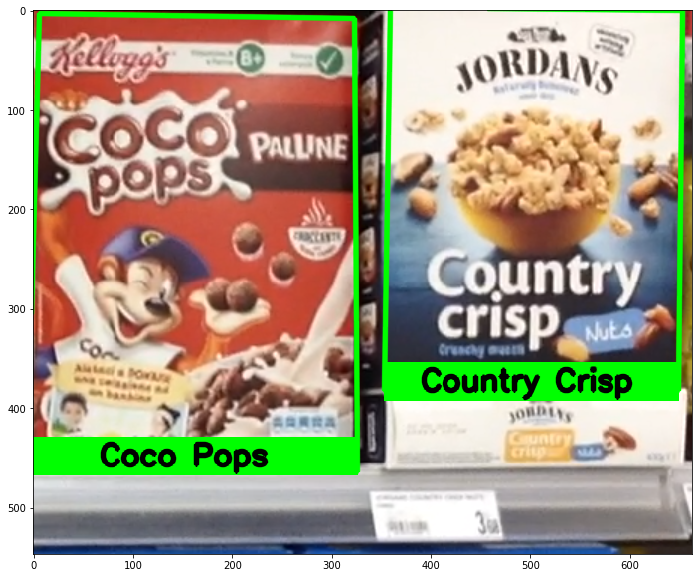

In [22]:
#open scene image
plt.figure(figsize=(20, 10))
plt.imshow(copy_scene);
plt.show();

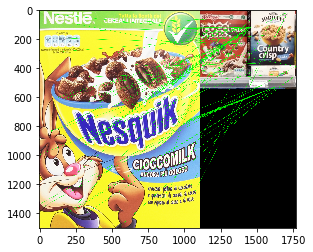

In [23]:
# Drawing the matches
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None, # not draw keypoints only matching lines
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2) # not draw keypoints only lines
img3 = cv2.drawMatches(images[0],kp_models[0],scene_image_rgb,kp_scene,good[0],None,**draw_params)
plt.imshow(img3)
plt.show()

In [24]:
images

{0: array([[[147, 226,  98],
         [147, 226,  98],
         [145, 226,  95],
         ...,
         [205, 240, 146],
         [211, 246, 154],
         [223, 253, 165]],
 
        [[145, 224,  96],
         [146, 225,  97],
         [144, 225,  94],
         ...,
         [205, 240, 146],
         [211, 246, 154],
         [223, 253, 167]],
 
        [[145, 224,  96],
         [145, 224,  96],
         [144, 225,  94],
         ...,
         [206, 241, 147],
         [212, 247, 155],
         [222, 252, 166]],
 
        ...,
 
        [[251, 247,  54],
         [251, 247,  54],
         [251, 247,  54],
         ...,
         [252, 249,  58],
         [253, 250,  59],
         [255, 250,  62]],
 
        [[252, 247,  57],
         [252, 247,  57],
         [251, 246,  56],
         ...,
         [252, 249,  58],
         [253, 250,  59],
         [255, 251,  63]],
 
        [[253, 248,  58],
         [252, 247,  57],
         [252, 247,  57],
         ...,
         [253, 250,  59],

Il problema è che molti modelli hanno la parte sopra uguale quindi nell'analisi dei punti chiave dei modelli non considero la parte sopra.